# PCA: Principle component analysis
## Importing necessary libraries

In [64]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Digit dataset

In [65]:
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [66]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Unique target values

In [67]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [69]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## Splitting data into fratures and target

In [70]:
x=df
y=dataset.target

In [71]:
y

array([0, 1, 2, ..., 8, 9, 8])

## Scaling data

In [72]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Splitting data into training and testing data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.2,random_state=30)

## Logistic regression without PCA

In [74]:
logisticregressor=LogisticRegression()
logisticregressor.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation by checking score

In [75]:
logisticregressor.score(x_test,y_test)

0.9722222222222222

## PCA analysis by retaining 95% of imformation

In [76]:
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

## Amount of loss in information per row

In [77]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

## Number of components

In [78]:
pca.n_components_

29

## Performing Logistic regression after Principle component analysis

In [79]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=.2,random_state=30)

In [80]:
logisticregressor2=LogisticRegression(max_iter=300)
logisticregressor2.fit(x_train_pca,y_train)


LogisticRegression(max_iter=300)

## Evaluating model after PCA

In [81]:
logisticregressor2.score(x_test_pca,y_test)

0.9694444444444444

## PCA for 2 components

In [82]:
pca2=PCA(n_components=2)
x_pca2=pca2.fit_transform(x)

In [83]:
x_pca2.shape

(1797, 2)

In [84]:
x_pca2

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [85]:
pca2.explained_variance_ratio_

array([0.14890594, 0.13618771])

## Logistic Regression after 2 component PCA

In [86]:
x_train_pca2,x_test_pca2,y_train,y_test=train_test_split(x_pca2,y,test_size=.2,random_state=30)

In [87]:
logisticregressor3=LogisticRegression(max_iter=400)
logisticregressor3.fit(x_train_pca2,y_train)

LogisticRegression(max_iter=400)

## Evaluation of Logistic Regression after PCA with 2 components

In [88]:
logisticregressor3.score(x_test_pca2,y_test)

0.6083333333333333

## Analysis of PCA for 2 to 63 component to find minimum number of component required for 0.95 score

In [89]:
count=0
score=[]
for i in range(2,64):
    ipca=PCA(n_components=i)
    x_ipca=ipca.fit_transform(x)
    x_train_ipca,x_test_ipca,y_train,y_test=train_test_split(x_ipca,y,test_size=.2,random_state=30)
    logisticregressori=LogisticRegression(max_iter=1000)
    logisticregressori.fit(x_train_ipca,y_train)
    score.append(logisticregressori.score(x_test_ipca,y_test))
print(score)

[0.6083333333333333, 0.6777777777777778, 0.8138888888888889, 0.8555555555555555, 0.8583333333333333, 0.8861111111111111, 0.9055555555555556, 0.9388888888888889, 0.9416666666666667, 0.9305555555555556, 0.9444444444444444, 0.9472222222222222, 0.95, 0.95, 0.9472222222222222, 0.95, 0.95, 0.9527777777777777, 0.9666666666666667, 0.9638888888888889, 0.9666666666666667, 0.9638888888888889, 0.9638888888888889, 0.9638888888888889, 0.9666666666666667, 0.9666666666666667, 0.9694444444444444, 0.9694444444444444, 0.9666666666666667, 0.9694444444444444, 0.9666666666666667, 0.975, 0.975, 0.9722222222222222, 0.9722222222222222, 0.975, 0.9694444444444444, 0.9666666666666667, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9666666666666667, 0.9694444444444444, 0.9722222222222222, 0.9722222222222222, 0.975, 0.975, 0.9722222222222222, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


In [90]:
components=list(range(2,64))
print(components)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


## Plot of linear regression model score Vs number of PCA component

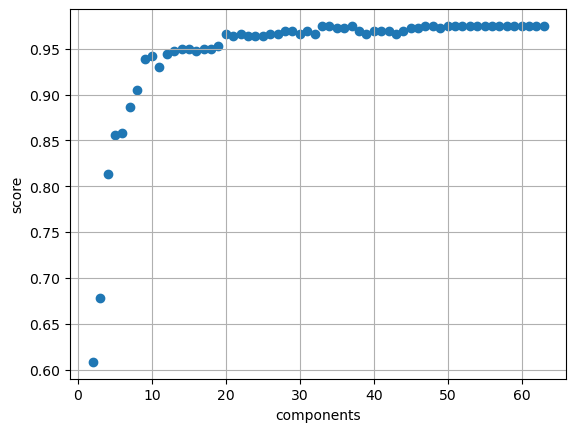

In [91]:
plt.scatter(components,score)
plt.ylabel("score")
plt.xlabel("components")
plt.grid()
plt.show()

In [92]:
pca_analysis=pd.DataFrame({"Components":components,"Score":score})
pca_analysis.head(20)

,Components,Score
0,2,0.608333
1,3,0.677778
2,4,0.813889
3,5,0.855556
4,6,0.858333
5,7,0.886111
6,8,0.905556
7,9,0.938889
8,10,0.941667
9,11,0.930556


## Conclusion:- to achive score around 0.95 minimum 14 component PCA required